In [1]:
import json 
import matplotlib
from matplotlib import pyplot as plt
import pickle
import pandas as pd

In [2]:
# pd.set_option('display.max_columns', 1000)  # or 1000
# pd.set_option('display.max_rows', 100000)  # or 1000
# pd.set_option('display.max_colwidth', None) 

In [3]:
data_path = '../../'
data = pd.read_csv('../../data/raw-data/everything.csv', index_col=0)

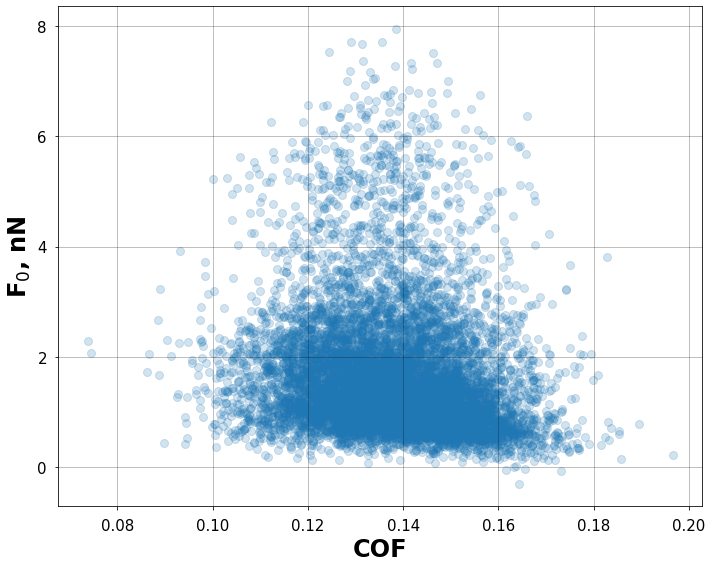

In [4]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    index.append(i)
    cof.append(row['COF'])
    f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 

#plt.title('F$_0$ vs COF', fontsize=20)
plt.ylabel('F$_0$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.scatter(cof, f0, alpha=alpha, marker='o')
plt.savefig(fname='./plots/COF_vs_F0.pdf', dpi=500)

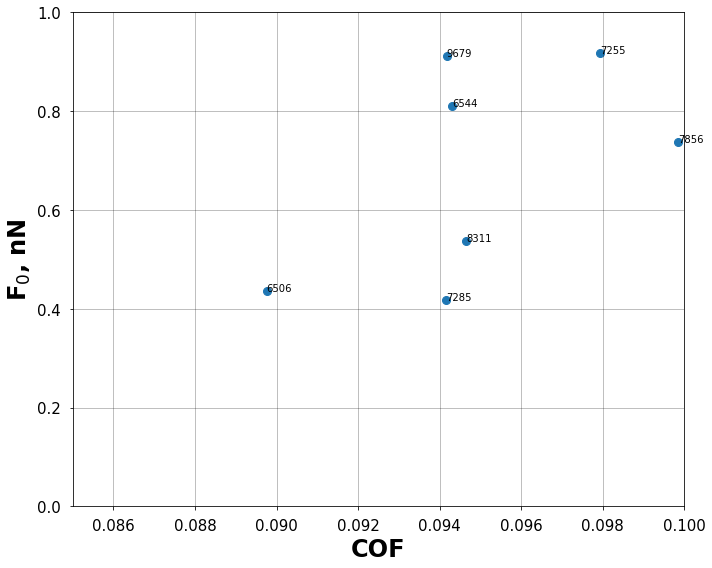

In [5]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    if row['COF'] < 0.1 and row['intercept'] < 1:
        index.append(i)
        cof.append(row['COF'])
        f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 

#plt.title('F$_0$ vs COF', fontsize=20)
plt.ylabel('F$_0$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.ylim(0, 1)
plt.xlim(0.085, 0.1)
plt.scatter(cof, f0, alpha=1, marker='o')

for i, txt in enumerate(index):
    plt.annotate(txt, (cof[i], f0[i]))
    
plt.savefig(fname='./plots/zoomed_COF_vs_F0.pdf', dpi=500)

In [6]:
condensed_data = data.iloc[index]
condensed_data 


,terminal_group_1,terminal_group_2,terminal_group_3,backbone,frac-1,frac-2,COF,MR-mean,MR-min,asphericity-mean,...,vsa-fppos-mean,vsa-fppos-min,vsa-hyd-mean,vsa-hyd-min,vsa-polar+-mean,vsa-polar+-min,vsa-polar--mean,vsa-polar--min,vsa-polar-mean,vsa-polar-min
6506,isopropyl,cyclopropyl,cyano,alkylsilane,0.25,0.75,0.089755,15.106750,11.2870,0.589179,...,0.000000,0.0,29.838956,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
6544,isopropyl,ethylene,cyano,alkylsilane,0.25,0.75,0.094308,14.159125,11.2870,0.760418,...,0.000000,0.0,26.539626,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
7255,methyl,fluorophenyl,methyl,alkylsilane,0.25,0.75,0.097933,18.768875,11.3480,0.137172,...,0.000000,0.0,33.204291,21.928335,0.000000,0.0,1.646406,0.0,0.029198,0.0
7285,methyl,isopropyl,cyano,alkylsilane,0.25,0.75,0.094152,14.754000,11.2870,0.646285,...,0.000000,0.0,28.947640,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
7856,nitrophenyl,cyano,cyclopropyl,alkylsilane,0.25,0.75,0.099843,18.160800,17.9236,0.486007,...,0.010626,0.0,32.977569,29.497370,0.710923,0.0,1.264290,0.0,0.029523,0.0
8311,perfluoromethyl,isopropyl,cyano,alkylsilane,0.25,0.75,0.094658,14.801625,11.2870,0.669990,...,0.025470,0.0,29.223525,22.295281,0.772037,0.0,0.000000,0.0,0.025470,0.0
9679,toluene,isopropyl,cyano,alkylsilane,0.25,0.75,0.094175,17.825000,11.2870,0.690182,...,0.000000,0.0,34.045091,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [7]:
condensed_data = condensed_data[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','intercept']]

In [8]:
renamed_cdata = condensed_data.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'intercept': 'F$_0$'})

In [9]:
import pdfkit as pdf
renamed_cdata.to_html('./plots/zoomed_table.html')
pdf.from_file('./plots/zoomed_table.html',
              './plots/zoomed_table.pdf')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

In [10]:
renamed_cdata

,Terminal Group A,Terminal Group B,Terminal Group C,Fraction A,Fraction B,Backbone,COF,F$_0$
6506,isopropyl,cyclopropyl,cyano,0.25,0.75,alkylsilane,0.089755,0.435365
6544,isopropyl,ethylene,cyano,0.25,0.75,alkylsilane,0.094308,0.809519
7255,methyl,fluorophenyl,methyl,0.25,0.75,alkylsilane,0.097933,0.916881
7285,methyl,isopropyl,cyano,0.25,0.75,alkylsilane,0.094152,0.418087
7856,nitrophenyl,cyano,cyclopropyl,0.25,0.75,alkylsilane,0.099843,0.736974
8311,perfluoromethyl,isopropyl,cyano,0.25,0.75,alkylsilane,0.094658,0.536613
9679,toluene,isopropyl,cyano,0.25,0.75,alkylsilane,0.094175,0.910905


In [11]:
for idx, row in renamed_cdata.iterrows():
    print(idx)
    renamed_cdata.at[idx, 'COF'] = round(row['COF'], 4)
    renamed_cdata.at[idx, 'F$_0$'] = round(row['F$_0$'], 3)


6506
6544
7255
7285
7856
8311
9679


In [12]:
renamed_cdata

,Terminal Group A,Terminal Group B,Terminal Group C,Fraction A,Fraction B,Backbone,COF,F$_0$
6506,isopropyl,cyclopropyl,cyano,0.25,0.75,alkylsilane,0.0898,0.435
6544,isopropyl,ethylene,cyano,0.25,0.75,alkylsilane,0.0943,0.810
7255,methyl,fluorophenyl,methyl,0.25,0.75,alkylsilane,0.0979,0.917
7285,methyl,isopropyl,cyano,0.25,0.75,alkylsilane,0.0942,0.418
7856,nitrophenyl,cyano,cyclopropyl,0.25,0.75,alkylsilane,0.0998,0.737
8311,perfluoromethyl,isopropyl,cyano,0.25,0.75,alkylsilane,0.0947,0.537
9679,toluene,isopropyl,cyano,0.25,0.75,alkylsilane,0.0942,0.911


In [13]:
# bottom 1
terminal_groups_A = ['acetyl', 'amino', 'carboxyl', 'cyano', 'cyclopropyl',
                     'ethylene', 'fluorophenyl', 'hydroxyl', 'isopropyl',
                     'methoxy', 'methyl', 'nitro', 'nitrophenyl',
                     'perfluoromethyl', 'phenyl', 'pyrrole', 'toluene',
                     'phenol', 'difluoromethyl']
# bottom 2
terminal_groups_B = ['acetyl', 'amino', 'carboxyl', 'cyano', 'cyclopropyl',
                     'ethylene', 'fluorophenyl', 'hydroxyl', 'isopropyl',
                     'methoxy', 'methyl', 'nitro', 'nitrophenyl',
                     'perfluoromethyl', 'phenyl', 'pyrrole', 'toluene',
                     'phenol', 'difluoromethyl']

# top 
terminal_groups_C = ['acetyl', 'amino', 'carboxyl', 'cyano', 'cyclopropyl',
                     'ethylene', 'fluorophenyl', 'hydroxyl', 'isopropyl',
                     'methoxy', 'methyl', 'nitro', 'nitrophenyl',
                     'perfluoromethyl', 'phenyl', 'pyrrole', 'toluene',
                     'phenol', 'difluoromethyl']


In [14]:
combinations = dict()
for A in terminal_groups_A:
    for B in terminal_groups_B:
        for C in terminal_groups_C:
            key = (C, tuple(sorted((A,B))))
            C_C_C = data.loc[(data['terminal_group_1'] == C) &
                             (data['terminal_group_2'] == C) &
                             (data['terminal_group_3'] == C)]
            A_A_C = data.loc[(data['terminal_group_1'] == A) &
                             (data['terminal_group_2'] == A) &
                             (data['terminal_group_3'] == C)]
            B_B_C = data.loc[(data['terminal_group_1'] == B) &
                             (data['terminal_group_2'] == B) &
                             (data['terminal_group_3'] == C)]
            A_B_C_5050 = data.loc[(data['terminal_group_1'] == A) &
                                  (data['terminal_group_2'] == B) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.5) &
                                  (data['frac-2'] == 0.5)]
            A_B_C_2575 = data.loc[(data['terminal_group_1'] == A) &
                                  (data['terminal_group_2'] == B) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            B_A_C_2575 = data.loc[(data['terminal_group_1'] == B) &
                                  (data['terminal_group_2'] == A) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            A_C_C_5050 = data.loc[(data['terminal_group_1'] == A) &
                                  (data['terminal_group_2'] == C) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.50) &
                                  (data['frac-2'] == 0.50)]
            A_C_C_2575 = data.loc[(data['terminal_group_1'] == A) &
                                  (data['terminal_group_2'] == C) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            C_A_C_2575 = data.loc[(data['terminal_group_1'] == C) &
                                  (data['terminal_group_2'] == A) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            B_C_C_5050 = data.loc[(data['terminal_group_1'] == B) &
                                  (data['terminal_group_2'] == C) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.50) &
                                  (data['frac-2'] == 0.50)]
            B_C_C_2575 = data.loc[(data['terminal_group_1'] == B) &
                                  (data['terminal_group_2'] == C) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            C_B_C_2575 = data.loc[(data['terminal_group_1'] == C) &
                                  (data['terminal_group_2'] == B) &
                                  (data['terminal_group_3'] == C) &
                                  (data['frac-1'] == 0.25) &
                                  (data['frac-2'] == 0.75)]
            tabs = pd.DataFrame()
            tabs = tabs.append([C_C_C, A_A_C, B_B_C,
                                A_C_C_5050, A_C_C_2575, C_A_C_2575,
                                B_C_C_5050, B_C_C_2575, C_B_C_2575,
                                A_B_C_5050, A_B_C_2575, B_A_C_2575])

            combinations[key] = {'C-C-C': C_C_C,
                                 'A-B-C-5050': A_B_C_5050,
                                 'A-B-C-2575': A_B_C_2575,
                                 'B-A-C-2575': B_A_C_2575,
                                 'A-C-C-5050': A_C_C_5050,
                                 'A-C-C-2575': A_C_C_2575,
                                 'C-A-C-2575': C_A_C_2575,
                                 'B-C-C-5050': B_C_C_5050,
                                 'B-C-C-2575': B_C_C_2575,
                                 'C-B-C-2575': C_B_C_2575,
                                 'B-B-C': B_B_C,
                                 'A-A-C': A_A_C, 
                                 'tabs': tabs}           
            

In [15]:
data.iloc[index]

,terminal_group_1,terminal_group_2,terminal_group_3,backbone,frac-1,frac-2,COF,MR-mean,MR-min,asphericity-mean,...,vsa-fppos-mean,vsa-fppos-min,vsa-hyd-mean,vsa-hyd-min,vsa-polar+-mean,vsa-polar+-min,vsa-polar--mean,vsa-polar--min,vsa-polar-mean,vsa-polar-min
6506,isopropyl,cyclopropyl,cyano,alkylsilane,0.25,0.75,0.089755,15.106750,11.2870,0.589179,...,0.000000,0.0,29.838956,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
6544,isopropyl,ethylene,cyano,alkylsilane,0.25,0.75,0.094308,14.159125,11.2870,0.760418,...,0.000000,0.0,26.539626,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
7255,methyl,fluorophenyl,methyl,alkylsilane,0.25,0.75,0.097933,18.768875,11.3480,0.137172,...,0.000000,0.0,33.204291,21.928335,0.000000,0.0,1.646406,0.0,0.029198,0.0
7285,methyl,isopropyl,cyano,alkylsilane,0.25,0.75,0.094152,14.754000,11.2870,0.646285,...,0.000000,0.0,28.947640,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0
7856,nitrophenyl,cyano,cyclopropyl,alkylsilane,0.25,0.75,0.099843,18.160800,17.9236,0.486007,...,0.010626,0.0,32.977569,29.497370,0.710923,0.0,1.264290,0.0,0.029523,0.0
8311,perfluoromethyl,isopropyl,cyano,alkylsilane,0.25,0.75,0.094658,14.801625,11.2870,0.669990,...,0.025470,0.0,29.223525,22.295281,0.772037,0.0,0.000000,0.0,0.025470,0.0
9679,toluene,isopropyl,cyano,alkylsilane,0.25,0.75,0.094175,17.825000,11.2870,0.690182,...,0.000000,0.0,34.045091,22.295281,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [16]:
sysofint = list()
for idx, sys in data.iloc[index].iterrows():
    A = sys['terminal_group_1']
    B = sys['terminal_group_2']
    C = sys['terminal_group_3']
    sysofint.append((C, tuple(sorted([A,B]))))

In [18]:
for idx, sys in combinations[sysofint[2]]['tabs'].iterrows():
    A = sys['terminal_group_1']
    B = sys['terminal_group_2']
    C = sys['terminal_group_3']

In [44]:
# Combination 1 
A = 'methyl'
B = 'carboxyl'
C = 'methyl'
key = (C, tuple(sorted([A, B])))
df = combinations[key]['tabs']
df = df.drop_duplicates()
df = df[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','intercept']]
df = df.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'intercept': 'F$_0$'})
for idx, row in df.iterrows():
    df.at[idx, 'COF'] = round(row['COF'], 4)
    df.at[idx, 'F$_0$'] = round(row['F$_0$'], 3)
df

,Terminal Group A,Terminal Group B,Terminal Group C,Fraction A,Fraction B,Backbone,COF,F$_0$
2799,methyl,methyl,methyl,0.50,0.50,alkylsilane,0.1488,0.702
689,carboxyl,carboxyl,methyl,0.50,0.50,alkylsilane,0.1342,0.689
858,carboxyl,methyl,methyl,0.50,0.50,alkylsilane,0.1409,0.976
4234,carboxyl,methyl,methyl,0.25,0.75,alkylsilane,0.1440,0.754
7160,methyl,carboxyl,methyl,0.25,0.75,alkylsilane,0.1358,0.652


In [45]:
# Combination 2 
A = 'methyl'
B = 'hydroxyl'
C = 'methyl'
key = (C, tuple(sorted([A, B])))
df = combinations[key]['tabs']
df = df.drop_duplicates()
df = df[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','intercept']]
df = df.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'intercept': 'F$_0$'})
for idx, row in df.iterrows():
    df.at[idx, 'COF'] = round(row['COF'], 4)
    df.at[idx, 'F$_0$'] = round(row['F$_0$'], 3)
df

,Terminal Group A,Terminal Group B,Terminal Group C,Fraction A,Fraction B,Backbone,COF,F$_0$
2799,methyl,methyl,methyl,0.50,0.50,alkylsilane,0.1488,0.702
2268,hydroxyl,hydroxyl,methyl,0.50,0.50,alkylsilane,0.1530,0.765
2323,hydroxyl,methyl,methyl,0.50,0.50,alkylsilane,0.1452,0.607
6286,hydroxyl,methyl,methyl,0.25,0.75,alkylsilane,0.1664,0.604
7274,methyl,hydroxyl,methyl,0.25,0.75,alkylsilane,0.1627,0.700


In [46]:
# Combination 3 
A = 'hydroxyl'
B = 'carboxyl'
C = 'methyl'
key = (C, tuple(sorted([A, B])))
df = combinations[key]['tabs']
df = df.drop_duplicates()
df = df[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','intercept']]
df = df.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'intercept': 'F$_0$'})
for idx, row in df.iterrows():
    df.at[idx, 'COF'] = round(row['COF'], 4)
    df.at[idx, 'F$_0$'] = round(row['F$_0$'], 3)
df

,Terminal Group A,Terminal Group B,Terminal Group C,Fraction A,Fraction B,Backbone,COF,F$_0$
2799,methyl,methyl,methyl,0.50,0.50,alkylsilane,0.1488,0.702
2268,hydroxyl,hydroxyl,methyl,0.50,0.50,alkylsilane,0.1530,0.765
689,carboxyl,carboxyl,methyl,0.50,0.50,alkylsilane,0.1342,0.689
2323,hydroxyl,methyl,methyl,0.50,0.50,alkylsilane,0.1452,0.607
6286,hydroxyl,methyl,methyl,0.25,0.75,alkylsilane,0.1664,0.604
7274,methyl,hydroxyl,methyl,0.25,0.75,alkylsilane,0.1627,0.700
858,carboxyl,methyl,methyl,0.50,0.50,alkylsilane,0.1409,0.976
4234,carboxyl,methyl,methyl,0.25,0.75,alkylsilane,0.1440,0.754
7160,methyl,carboxyl,methyl,0.25,0.75,alkylsilane,0.1358,0.652
6134,hydroxyl,carboxyl,methyl,0.25,0.75,alkylsilane,0.1400,0.612


In [19]:
import seaborn as sns
import numpy as np

In [20]:
len(data)

9847

In [21]:
hist = pd.DataFrame()
total = 0
for i in np.linspace(-1, 9, 21):
    for j in np.linspace(0.085, 0.2, 21):
        count = 0
        for k, row in data.iterrows():
            if j <= row['COF'] < j + ((0.2-0.085)/20) and \
               i <= row['intercept'] < i + ((9-(-1))/20):
                count += 1
        total += count
        tmp_data = {'COF':j,
                'intercept':i,
                'n':count}
        hist = hist.append(tmp_data, ignore_index=True)

        
print(total)

9845


In [22]:
pivot = hist.pivot(index='intercept', columns='COF', values='n')